In [14]:
import pandas as pd
import numpy as np
from scipy import signal
df=pd.read_csv('center_sternum.txt',sep='\t')

df['Time']=np.arange(0,len(df['qi']))/200

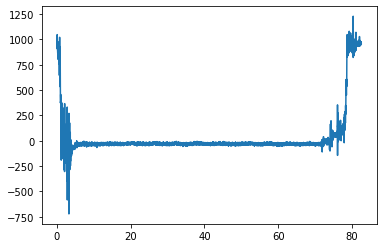

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['Time'],df['AccX'])


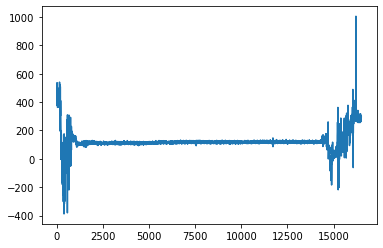

In [10]:
plt.plot(df['AccY'])

<IPython.core.display.Javascript object>


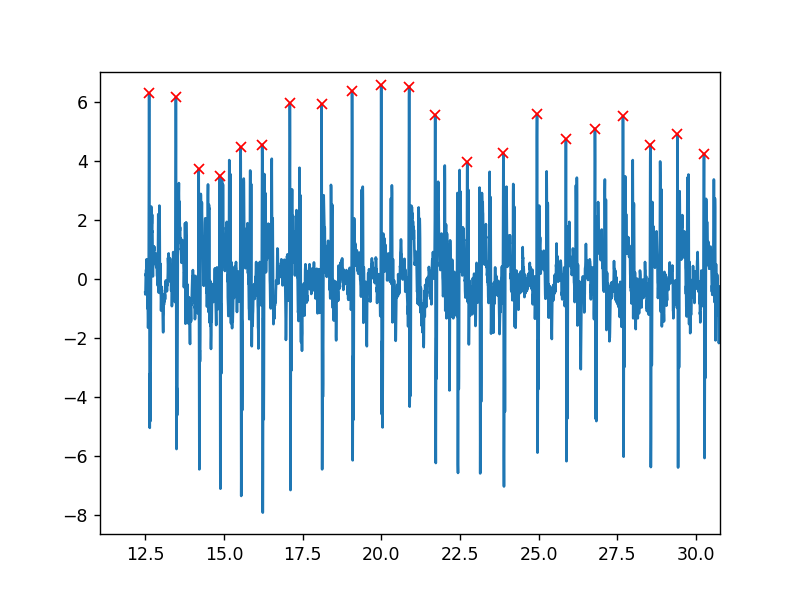

[  25  195  340  474  606  743  919 1120 1314 1499 1677 1842 2046 2275
 2489 2672 2857 3035 3209 3381 3550 3716 3882 4046 4201 4354 4510 4686
 4877 5064 5248 5424 5589 5754 5919 6094 6277 6456 6631 6800 6962 7124
 7296 7485 7674 7857 8034 8203 8364 8524 8696 8882 9067 9216 9405 9568
 9740 9928]


In [33]:
plt.figure()
data = (df['GyroX'].iloc[2500:12500].values-np.mean(df['GyroX'].iloc[2500:12500].values))
plt.plot(df['Time'].iloc[2500:12500],data)
peaks,_ = signal.find_peaks(data, height=2, distance=100)
print(peaks)
plt.plot(df['Time'].iloc[2500:12500].values[peaks],data[peaks], 'rx')


<IPython.core.display.Javascript object>


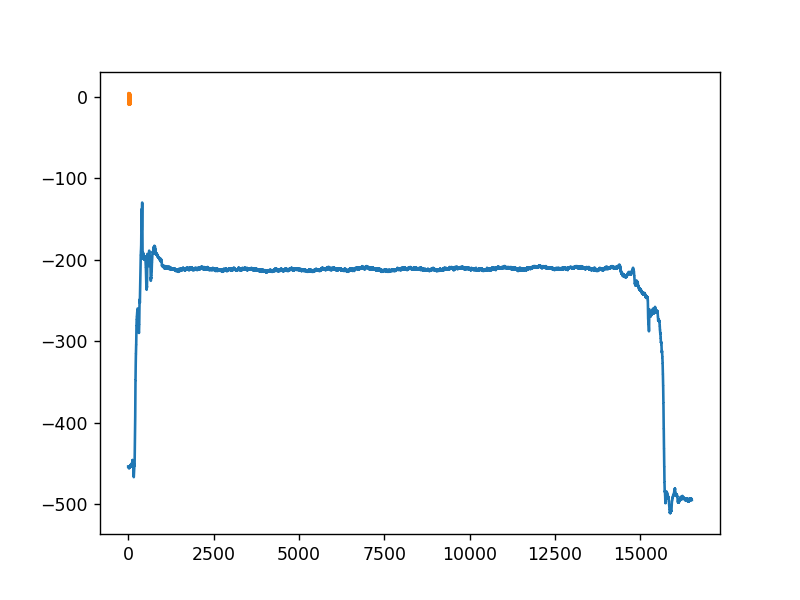

In [13]:
#%matplotlib notebook

plt.plot(df['MagnX'])

<IPython.core.display.Javascript object>


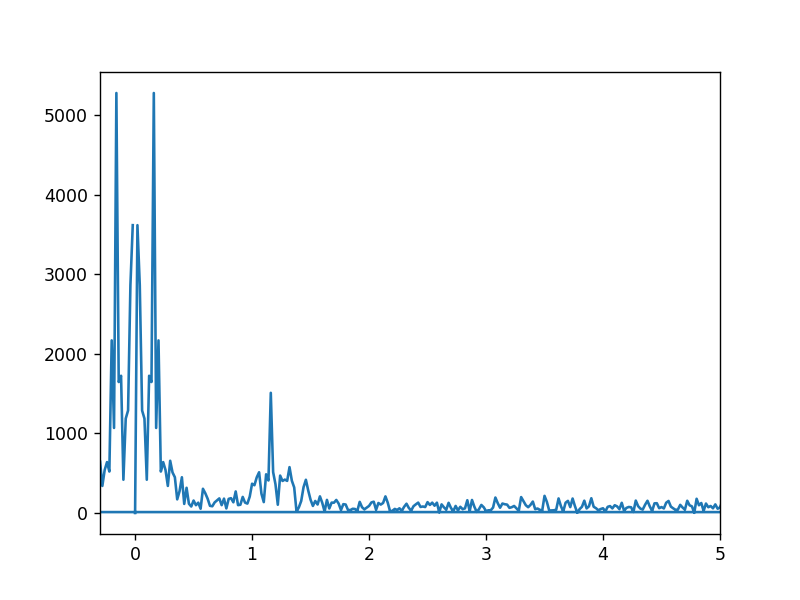

(-0.3, 5.0)

In [7]:
import numpy as np
gyroxfreq=np.fft.fft(df['MagnX'].iloc[2500:12500]-np.mean(df['MagnX'].iloc[2500:12500]))

freq=np.fft.fftfreq(d=1/200, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))
plt.xlim(-0.3,5)